# 트리 알고리즘

## 결정 트리

- 예 / 아니오에 대한 질문을 이어나가면서 정답을 찾아 학습하는 알고리즘
- 비교적 예측 과정을 이해하기 쉽고 성능도 뛰어남

In [4]:
import pandas as pd

red_wine = pd.read_csv('data/winequality-red.csv', sep=';')
white_wine = pd.read_csv('data/winequality-white.csv', sep=';')

red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
red_wine = red_wine[['alcohol', 'residual sugar', 'pH']]
red_wine.rename(columns={'residual sugar': 'sugar'}, inplace=True)
red_wine['class'] = 0
red_wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0
1,9.8,2.6,3.20,0
2,9.8,2.3,3.26,0
3,9.8,1.9,3.16,0
4,9.4,1.9,3.51,0


In [8]:
white_wine = white_wine[['alcohol', 'residual sugar', 'pH']]
white_wine.rename(columns={'residual sugar': 'sugar'}, inplace=True)
white_wine['class'] = 1

In [9]:
# concat => 위아래 , merge => 좌우
wine = pd.concat([red_wine, white_wine])

In [10]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6497 entries, 0 to 4897
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   int64  
dtypes: float64(3), int64(1)
memory usage: 253.8 KB


In [11]:
data = wine[['alcohol', 'sugar', 'pH']]
target = wine[['class']]

In [12]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(data, target)

In [13]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [14]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.7770935960591133
0.784


C:\Users\1-03\Desktop\DAMF2\ml\venv\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [22]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=50)
# dt.fit(train_scaled, train_target)
dt.fit(train_input, train_target)

# print(dt.score(train_scaled, train_target))
# print(dt.score(test_scaled, test_target))
print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))
# 특성값을 표준점수로 바꾸지않아도 됨

0.9971264367816092
0.8732307692307693


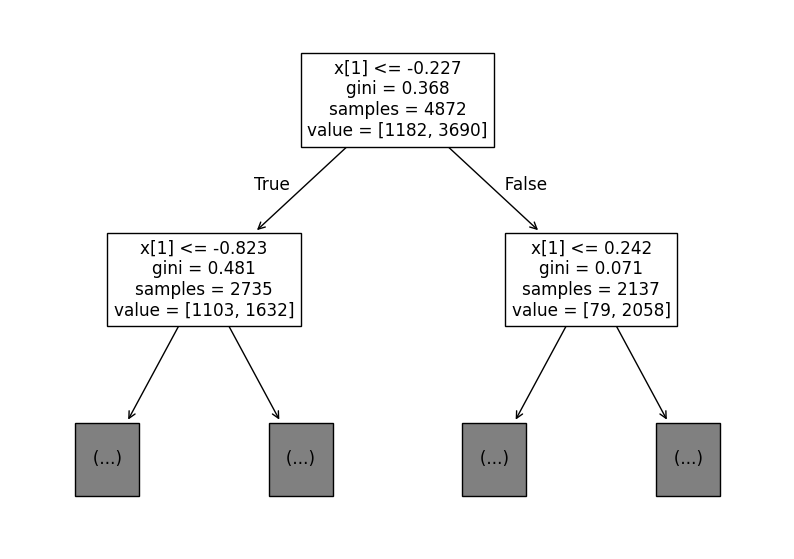

In [20]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(10, 7))
plot_tree(dt, max_depth=1)
plt.show()

### 불순도

- 결정 트리가 최적의 질문을 찾기 위한 기준
- 사이킷런은 지니 불순도와 엔트로피 불순도를 제공
- 얼마만큼 편향되어있냐라는 수치
- 0에 가까울수록 잘 나눴다는 의미, 0.5의 경우 최악

### 정보 이득

- 결정 트리 알고리즘은 정보 이득이 최대화되도록 학습
- 부모 노드와 자식 노드의 불순도 차이

- 결정 트리는 제한 없이 성장하면 훈련 세트에 과대적합되기 쉬움
- `가지치기`는 결정 트리의 성장을 제한하는 방법

### 특성 중요도

- 결정 트리에 사용된 특성이 불순도를 감소하는데 기여한 정도를 나타내는 값
- 특성 중요도를 계산할 수 있는 것이 결정 트리의 또다른 큰 장점